In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.method as mem
import numpy as np

一分为二的预测说：“是的，将会发生一个事件”，或者“否，该事件不会发生”。雨雾预报是是/否预报的常见示例。对于某些应用，可以指定阈值以分隔“是”和“否”，例如，风速大于50节。

为了验证这种类型的预测，我们从列联表开始，该表显示“是”和“否”的预测和出现的频率（样本数）。预测（是或否）和观测值（是或否）的四种组合称为联合分布：

     命中-事件预测发生，并且确实发生了
     漏报-事件预测未发生，但确实发生了
     空报-发生事件预测，但未发生
     正确的否定-事件预测不会发生，也不会发生

列联表的左下方给出了观测和预测的发生与未发生的总数，称为边际分布。  
  
以下结合随机生成的测试数据，说明基于上述列联表计算的各种检验指标 

In [2]:
ob = np.random.randn(2,10)
fo = np.random.randn(2,10)
ob[ob < 0] = 0
fo[fo < 0] = 0
grade_list = [0.1,1]

In [3]:
ob

array([[2.9464922 , 0.        , 0.        , 0.82828593, 0.86512948,
        0.        , 0.        , 0.46326279, 0.        , 0.        ],
       [1.04346752, 0.        , 0.02465048, 0.        , 0.28783189,
        2.17330654, 0.37324451, 0.21865912, 0.        , 1.64328858]])

In [4]:
fo

array([[0.        , 0.58069609, 0.        , 0.        , 1.5965974 ,
        0.70771496, 0.11970427, 0.6301141 , 1.38516428, 0.        ],
       [0.22725581, 0.14042986, 0.66738854, 0.        , 0.        ,
        0.25545206, 0.        , 0.        , 0.02691251, 0.70417287]])

### 命中、空报、漏报、正确否定     
**hfmc(ob, fo, grade_list=None)**  
用来计算常用二分类预报检验指标的中间统计量    

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list:  该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 长度为4的一维numpy数组，其内容依次为命中、空报、漏报、正确否定的样本数  
**调用示例：**  

In [5]:
hfmc_array = mem.hfmc(ob,fo,grade_list)
hfmc_array

array([[ 5.,  6.,  5.,  4.],
       [ 0.,  2.,  4., 14.]])

在上述示例中，hfmc返回结果是一个二维数组，最后一维长度为4，倒数第2维长度为2，和grade_list对应。返回结果hfmc_array将在后续示例中被应用。

###  观测发生率  
**s(ob, fo,grade_list=[1e-30])**  
基于原始数据计算 base rate： Observed yes/Total

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据     
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。    


###  观测发生率  
**s_hfmc(hfmc_array)**  
基于中间结果计算 base rate： Observed yes/Total，

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数        
**调用示例：**  

In [6]:
mem.s(ob,fo)    #grade_list缺省

array([0.55])

In [7]:
mem.s(ob,fo,grade_list)  #包含grade_list阈值参数，可以同时用于多个阈值的检验

array([0.5, 0.2])

In [8]:
mem.s_hfmc(hfmc_array)

array([0.5, 0.2])

###  预报发生率  
**r(ob, fo,grade_list=[1e-30])**  
基于原始数据计算 forecast rate： Forecast yes/Total

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据     
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。    


###  预报发生率  
**s_hfmc(hfmc_array)**  
基于中间结果计算 forecast rate： Torecast yes/Total

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数      
**调用示例：**   

In [9]:
mem.r(ob,fo)

array([0.6])

In [10]:
mem.r(ob,fo,grade_list)

array([0.55, 0.1 ])

In [11]:
mem.r_hfmc(hfmc_array)

array([0.55, 0.1 ])

###  准确率  
**pc(ob, fo,grade_list=[1e-30])**  
基于原始数据计算accuracy： （Hits+ Correct negatives）/Total，反映被正确预报的样本占比

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为1      

###  准确率  
**pc_hfmc(hfmc_array)**  
基于中间结果计算 accuracy： （Hits+ Correct negatives）/Total，反映被正确预报的样本占比

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。其中每个元素为0到1的实数，完美预报对应值为1        
**调用示例：** 

In [12]:
mem.pc(ob,fo)

array([0.45])

In [13]:
mem.pc(ob,fo,grade_list)

array([0.45, 0.7 ])

In [14]:
mem.pc_hfmc(hfmc_array)

array([0.45, 0.7 ])

###  命中率  
**pod(ob, fo,grade_list=[1e-30])**  
基于原始数据计算hit rate： Hits/(Hits + Misses)，反映观测的正样本中多少被预报  

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为1       

###  命中率 
**pod_hfmc(hfmc_array)**  
基于中间结果计算hit rate：Hits/(Hits + Misses)，反映观测的正样本中多少被预报  

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。其中每个元素为0到1的实数，完美预报对应值为1        
**调用示例：** 

In [15]:
mem.pod(ob,fo)

array([0.54545455])

In [16]:
mem.pod(ob,fo,grade_list)

array([0.5, 0. ])

In [17]:
mem.pod_hfmc(hfmc_array)

array([0.5, 0. ])

###  成功率  
**sr(ob, fo,grade_list=[1e-30])**  
基于原始数据计算Success ratio ： Hits/(Hits + False alarms)，反映预报的正样本中实际发生的比例  

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为1       

###  成功率 
**sr_hfmc(hfmc_array)**  
基于中间结果计算Success ratio ： Hits/(Hits + False alarms)，反映预报的正样本中实际发生的比例  

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。其中每个元素为0到1的实数，完美预报对应值为1        
**调用示例：** 

In [18]:
mem.sr(ob,fo)

array([0.5])

In [19]:
mem.sr(ob,fo,grade_list)

array([0.45454545, 0.        ])

In [20]:
mem.sr_hfmc(hfmc_array)

array([0.45454545, 0.        ])

###  报空率  
**pofd(ob, fo,grade_list=[1e-30])**  
基于原始数据计算Probability of false detection： False alarms/(False alarms + Correct negatives)，反映观测负样本被预报为正样本的比例  

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为0       

###  报空率 
**pofd_hfmc(hfmc_array)**  
基于中间结果计算Probability of false detection： False alarms/(False alarms + Correct negatives)，反映观测负样本被预报为正样本的比例    

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。其中每个元素为0到1的实数，完美预报对应值为0       
**调用示例：** 

In [21]:
mem.pofd(ob,fo)

array([0.66666667])

In [22]:
mem.pofd(ob,fo,grade_list)

array([0.6  , 0.125])

In [23]:
mem.pofd_hfmc(hfmc_array)

array([0.6  , 0.125])

###  空报率  
**far(ob, fo,grade_list=[1e-30])**  
基于原始数据计算False alarm ratio： False alarms/(Hit + False alarms)，反映预报的正样本中实际未发生的比例   

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为0       

###  空报率 
**far_hfmc(hfmc_array)**  
基于中间结果计算False alarm ratio： False alarms/(Hit + False alarms)，反映预报的正样本中实际未发生的比例      

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。其中每个元素为0到1的实数，完美预报对应值为0       
**调用示例：** 

In [24]:
mem.far(ob,fo)

array([0.5])

In [25]:
mem.far(ob,fo,grade_list)

array([0.54545455, 1.        ])

In [26]:
mem.far_hfmc(hfmc_array)

array([0.54545455, 1.        ])

###  漏报率  
**mr(ob, fo,grade_list=[1e-30])**  
基于原始数据计算Miss ratio： Misses/(Hit + Misses)，反映观测正样本被预报为负样本的比例    

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为0       

### 漏报率   
**mr_hfmc(hfmc_array)**  
基于中间结果计算Miss ratio： Misses/(Hit + Misses)，反映观测正样本被预报为负样本的比例       

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。其中每个元素为0到1的实数，完美预报对应值为0       
**调用示例：** 

In [27]:
mem.mr(ob,fo)

array([0.45454545])

In [28]:
mem.mr(ob,fo,grade_list)

array([0.5, 1. ])

In [29]:
mem.mr_hfmc(hfmc_array)

array([0.5, 1. ])

###  偏差  
**bias(ob, fo,grade_list=[1e-30])**  
基于原始数据计算bias：(Hit + False alarms)/(Hit + Misses)，反映预报的正样本数 和 观测的正样本数的比值    

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到正无穷的实数，完美预报对应值为1       

### 偏差   
**bias_hfmc(hfmc_array)**  
基于中间结果计算bias：(Hit + False alarms)/(Hit + Misses)，反映预报的正样本数 和 观测的正样本数的比值         

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。其中每个元素值为0到正无穷的实数，完美预报对应值为1       
**调用示例：** 

In [30]:
mem.bias(ob,fo)

array([1.09090909])

In [31]:
mem.bias(ob,fo,grade_list)

array([1.1, 0.5])

In [32]:
mem.bias_hfmc(hfmc_array)

array([1.1, 0.5])

###  偏差幅度  
**bias_extend_linear(bias_array)**  
计算bias偏离1的幅度，采用 (bias - 1）的绝对值表示   

**参数说明：**  
 bias_array:任意维numpy数组,其中每个元素是bias值。     
 return: 返回一个和bias_array的shape一致的numpy数组       

### 偏差幅度   
**bias_extend_log(bias_array)**  
计算bias偏离1的幅度，采用 log(bias)的绝对值表示         

**参数说明：**  
 bias_array:任意维numpy数组,其中每个元素是bias值。     
 return: 返回一个和bias_array的shape一致的numpy数组         
**调用示例：** 

In [33]:
bias_array = mem.bias(ob,fo,grade_list)
mem.bias_extend_linear(bias_array)

array([0.1, 0.5])

In [34]:
mem.bias_extend_log(bias_array)

array([0.09531018, 0.69314718])

###  TS评分   
**ts(ob, fo,grade_list=[1e-30])**  
基于原始数据计算ts： Hit /(Hit + Misses+ False alarms)，反映预测的正样本与观察到的正样本对应的程度如何    

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为1       

### TS评分     
**ts_hfmc(hfmc_array)**  
基于中间结果计算ts： Hit /(Hit + Misses+ False alarms)，反映预测的正样本与观察到的正样本对应的程度如何          

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。每个元素值为0到1的实数，完美预报对应值为1           
**调用示例：** 

In [35]:
mem.ts(ob,fo)

array([0.35294118])

In [36]:
mem.ts(ob,fo,grade_list)

array([0.3125, 0.    ])

In [37]:
mem.ts_hfmc(hfmc_array)

array([0.3125, 0.    ])

###  ETS评分   
**ets(ob, fo,grade_list=[1e-30])**  
基于原始数据计算ets： (Hit-Hit_random) /(Hit + Misses+ False alarms - Hit_random)，反映预测的正样本与观察到的正样本对应的程度如何, 其中扣除了随机预报产生的命中数量，Hit_randwom = Forecast yes × Observed yes / Total   

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为1       

### ETS评分     
**ets_hfmc(hfmc_array)**  
基于中间结果计算ets： Hit /(Hit + Misses+ False alarms)，反映预测的正样本与观察到的正样本对应的程度如何          

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。每个元素值为0到1的实数，完美预报对应值为1           
**调用示例：** 

In [38]:
mem.ets(ob,fo)

array([-0.05769231])

In [39]:
mem.ets(ob,fo,grade_list)

array([-0.04761905, -0.07142857])

In [40]:
mem.ets_hfmc(hfmc_array)

array([-0.04761905, -0.07142857])

###  HK评分   
**hk_yesorno(ob, fo,grade_list=[1e-30])**  
Hanssen and Kuipers discriminant，统计准确率相对于随机预报的技巧.HK评分通常用于[多分类预报评分](https://www.showdoc.cc/meteva?page_id=3975612394328262)中，但二分类预报本身也是一种多分类预报，因此HK评分同样可以应用于二分类预报。该函数计算结果的物理含义和[多分类预报评分](https://www.showdoc.cc/meteva?page_id=3975612394328262)中的hk(ob,fo,grade_list = None)是一样的，但grade_list的意义是不一样的，在hk函数中grade_list是将实数域划分为多个区间，而hk_yesorno中的grade_list是相对于每次只将实数域划分为两个区间，然后再套上一层循环。

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为1       

### HK评分     
**hk_yesorno_hfmc(hfmc_array)**  
基于中间结果计算hk评分          

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数   
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。每个元素值为0到1的实数，完美预报对应值为1           
**调用示例：** 

In [41]:
mem.hk_yesorno(ob,fo,grade_list)

array([-0.1  , -0.125])

In [42]:
mem.hk_yesorno_hfmc(hfmc_array)

array([-0.1  , -0.125])

###  HSS评分   
**hss_yesorno(ob, fo,grade_list=[1e-30])**  
Heidke skill score，统计准确率相对于随机预报的技巧.  HSS评分通常用于[多分类预报评分](https://www.showdoc.cc/meteva?page_id=3975612394328262)中，但二分类预报本身也是一种多分类预报，因此HSS评分同样可以应用于二分类预报。该函数计算结果的物理含义和[多分类预报评分](https://www.showdoc.cc/meteva?page_id=3975612394328262)中的hs(ob,fo,grade_list = None)是一样的，但grade_list的意义是不一样的，在hss函数中grade_list是将实数域划分为多个区间，而hss_yesorno中的grade_list是相对于每次只将实数域划分为两个区间，然后再套上一层循环。

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 grade_list: 该参数用于对连续变量做多种等级阈值的二分类检验，其中包含多个事件是否记录为发生的判断阈值，记其中一个阈值为g，则判断为事件发生的条件是要素值 >= g。该参数缺省时列表中只包含一个取值为1e-30的阈值，由于气象要素精度通常比该缺省值大，因此它相当于将 >0 作为事件发生的判据   
 return: 返回一个一维numpy数组,其包含的检验指标和grade_list中的阈值一一对应。每个元素值为0到1的实数，完美预报对应值为1       

### HSS评分     
**hss_yesorno_hfmc(hfmc_array)**  
基于中间结果计算hk评分          

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数   
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。每个元素值为0到1的实数，完美预报对应值为1           
**调用示例：** 

In [43]:
mem.hss_yesorno(ob,fo,grade_list)

array([-0.1       , -0.15384615])

In [44]:
mem.hss_yesorno_hfmc(hfmc_array)

array([-0.1       , -0.15384615])

晴雨预报也是二分类预报，但由于降水观测存在T量概念，在业务检验中对T量降水样本的处理和普通的二分类预报有所不同。具体的检验列联表可以用下图表示：  
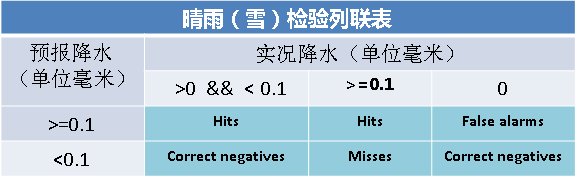
据此，晴雨预报的准确率计算公式也和普通的二分类检验的准确率有所差别，在本函数库中有针对性的增加概率晴雨准确率的计算模块，它包括直接计算函数和中间统计量计算函数。

### 晴雨预报的命中、空报、漏报、正确否定     
**hfmc_of_sun_rain((ob, fo)**  
用来计算常用晴雨预报检验指标的中间统计量    

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致  
 return: 长度为4的一维numpy数组，其内容依次为根据晴雨（雪）检验评定表计算出的命中、空报、漏报、正确否定的样本数  
 
  
 ###  晴雨准确率  
**pc_of_sun_rain(ob, fo)**  
基于原始数据计算accuracy： （Hits+ Correct negatives）/Total，反映被正确预报的样本占比

**参数说明：**  
 Ob:实况数据，任意维numpy数组   
 Fo:预测数据，任意维numpy数组,Fo.shape 和Ob.shape一致   
 return: 0到1的实数，完美预报对应值为1      

###  晴雨准确率  
**pc_of_sun_rain_hfmc(hfmc_array)**  
基于中间结果计算 accuracy： （Hits+ Correct negatives）/Total，反映被正确预报的样本占比

**参数说明：**  
 hfmc_array:包含总样本数和正确样本数的多维数组，其中最后一维长度为4,分别包含命中、空报、漏报、正确否定的样本数，倒数第二维长度为阈值个数      
 return: 返回一个多维numpy数组,其shape 和hfmc_array去掉最后一维之后的shape一致。最后一维长度为阈值个数。其中每个元素为0到1的实数，完美预报对应值为1   
**调用示例：**   



In [45]:
mem.pc_of_sun_rain(ob,fo)

0.5

In [46]:
hfmc_sr = mem.hfmc_of_sun_rain(ob,fo)
mem.pc_of_sun_rain_hfmc(hfmc_sr)

0.5

在以上示例中，观测和预报的数据规模较小，可以直接调用评分函数计算相应评分，然而有些情况下待检验的数据太大不能整体存入一个numpy数组中，或者不方便整体存入一个numpy数组中，就不能调用上面的方式调用评分函数， 此时可以采用本函数库中中间结果统计函数来实现分块计算或并行计算的方式来实现计算。其检验步骤如下：  
***步骤1：根据需要将分块数据逐一输入到中间结果计算函数***  
***步骤2：将中间结果进行累加或合并***  
***步骤3：根据累加或合并的中间结果计算检验指标***  
通常上述计算中步骤1是最耗费计算资源，为了提高效率步骤1也可以采用**并行**的方式执行。此外，步骤1执行的结果也可**输出到文件**中，在后续的检验可以从中读入部分中间结果执行后续步骤，从而可以实现各种方式的分组检验，大大提高检验计算效率。
同时，在预报检验经常需要进行分组检验，获得不同类别预报的评分指标并进行对比。此时可以应用上述基于中间结果的检验函数对多维中间统计量的整体计算能力来简化代码的复杂度。  
**示例如下：**

In [47]:
day_count = 100
model_count = 3
grade_list = [0.1,1]
ob = np.random.randn(day_count,1000)
fo = np.random.randn(model_count,day_count,1000)
ob[ob < 0] = 0
fo[fo < 0] = 0
hfmc_array = np.zeros((model_count,len(grade_list),4))
hfmc_sr = np.zeros((model_count,4))

for i in range(day_count):
    ob1 = ob[i,:]
    for j in range(model_count):
        fo1 = fo[j,i,:]
        hfmc_array[j,:,:] += mem.hfmc(ob1,fo1,grade_list)
        hfmc_sr[j,:] += mem.hfmc_of_sun_rain(ob1,fo1)

In [48]:
mem.pc_of_sun_rain_hfmc(hfmc_sr)

array([0.52192, 0.5211 , 0.52074])

In [49]:
mem.pc_hfmc(hfmc_array)

array([[0.50396, 0.73339],
       [0.50305, 0.73324],
       [0.50307, 0.73253]])

In [50]:
mem.ts_hfmc(hfmc_array)

array([[0.2984074 , 0.08654538],
       [0.29745815, 0.08590618],
       [0.29899278, 0.08616625]])

In [51]:
mem.bias_hfmc(hfmc_array)

array([[0.99361522, 0.98964803],
       [0.99311573, 0.98820503],
       [0.99976111, 0.99454169]])

以上只是展示了分类检验的维度为1的情况，实际上上述思路可以扩展至任意高维的情况。熟练使用中间统计量计算和合并方法，基于中间统计量整体计算分类问题下的检验指标数组，是提高代码编写效果的关键。上述检验函数的内部也都采用了numpy的整体计算方式实现，在计算效率上进行了最大程度的优化。

###  FSS评分   
说明待完善     
**调用示例：**     

In [52]:
#测试FSS_time
ob1 =ob[0:30,:].T
fo1 =fo[0,0:30,:].T

In [53]:
ob1

array([[0.22955209, 0.06563383, 0.74295   , ..., 0.80701135, 0.        ,
        0.        ],
       [0.98790527, 0.        , 0.        , ..., 2.34570532, 0.        ,
        1.65305917],
       [1.44433532, 0.        , 0.50936345, ..., 0.90727429, 0.88869912,
        0.        ],
       ...,
       [0.        , 0.        , 0.78662542, ..., 0.39605136, 1.76014172,
        0.36879512],
       [0.        , 0.        , 0.        , ..., 1.01159142, 0.        ,
        0.        ],
       [1.87507048, 0.94955468, 0.        , ..., 0.        , 0.        ,
        1.90110949]])

In [54]:
mem.FSS_time(ob1,fo1,window_size = 2)

array([[[0.47540984, 0.516     , 0.5025227 , 0.48553719, 0.47010309,
         0.48282828, 0.48987854, 0.50452261, 0.50640394, 0.51506317,
         0.4989858 , 0.47492323, 0.51512195, 0.47887324, 0.49948823,
         0.45454545, 0.50604839, 0.49537513, 0.49355798, 0.50642928,
         0.50850851, 0.51318458, 0.5182266 , 0.50909091, 0.47083333,
         0.49543147, 0.50632911, 0.51689861],
        [0.67326733, 0.65840589, 0.67134738, 0.64828056, 0.65087108,
         0.64377974, 0.66008174, 0.66777963, 0.6748507 , 0.66881443,
         0.67638291, 0.65218867, 0.67001339, 0.65817826, 0.65018625,
         0.66228828, 0.64855571, 0.6739651 , 0.67585743, 0.67970822,
         0.65701119, 0.67180691, 0.66845458, 0.67760295, 0.66250866,
         0.65025641, 0.67914439, 0.68522764]]])

In [55]:
mid_array = None
for i in range(10):
    mid_array = mem.merge_mid_FSS_time(mid_array,mem.mid_FSS_time(ob1[i::10,:],fo1[i::10,:],window_size = 2))
mem.FSS_time_base_on_mid(mid_array)

array([[[0.47540984, 0.516     , 0.5025227 , 0.48553719, 0.47010309,
         0.48282828, 0.48987854, 0.50452261, 0.50640394, 0.51506317,
         0.4989858 , 0.47492323, 0.51512195, 0.47887324, 0.49948823,
         0.45454545, 0.50604839, 0.49537513, 0.49355798, 0.50642928,
         0.50850851, 0.51318458, 0.5182266 , 0.50909091, 0.47083333,
         0.49543147, 0.50632911, 0.51689861],
        [0.67326733, 0.65840589, 0.67134738, 0.64828056, 0.65087108,
         0.64377974, 0.66008174, 0.66777963, 0.6748507 , 0.66881443,
         0.67638291, 0.65218867, 0.67001339, 0.65817826, 0.65018625,
         0.66228828, 0.64855571, 0.6739651 , 0.67585743, 0.67970822,
         0.65701119, 0.67180691, 0.66845458, 0.67760295, 0.66250866,
         0.65025641, 0.67914439, 0.68522764]]])